# DBSCAN Project

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

**Scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

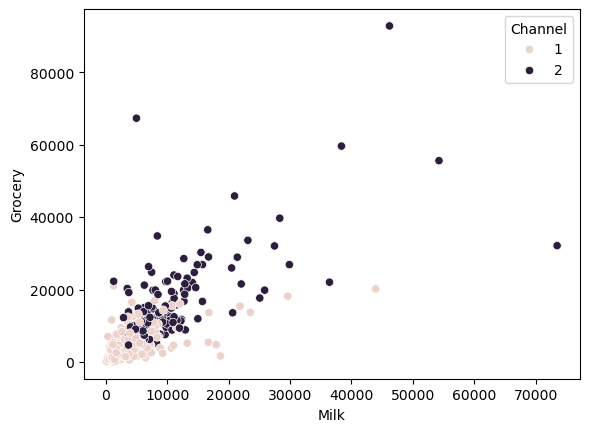

In [5]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

**Histogram of MILK spending, colored by Channel**

<AxesSubplot:xlabel='Milk', ylabel='Count'>

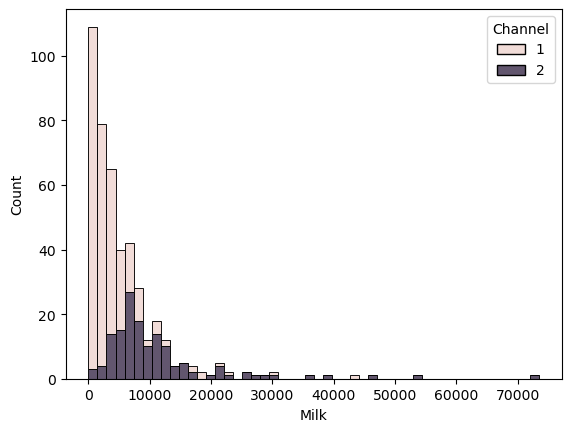

In [6]:
sns.histplot(df,x='Milk',hue='Channel',multiple="stack")

**Annotated clustermap of the correlations between spending on different cateogires**

Correlation Between Spending Categories


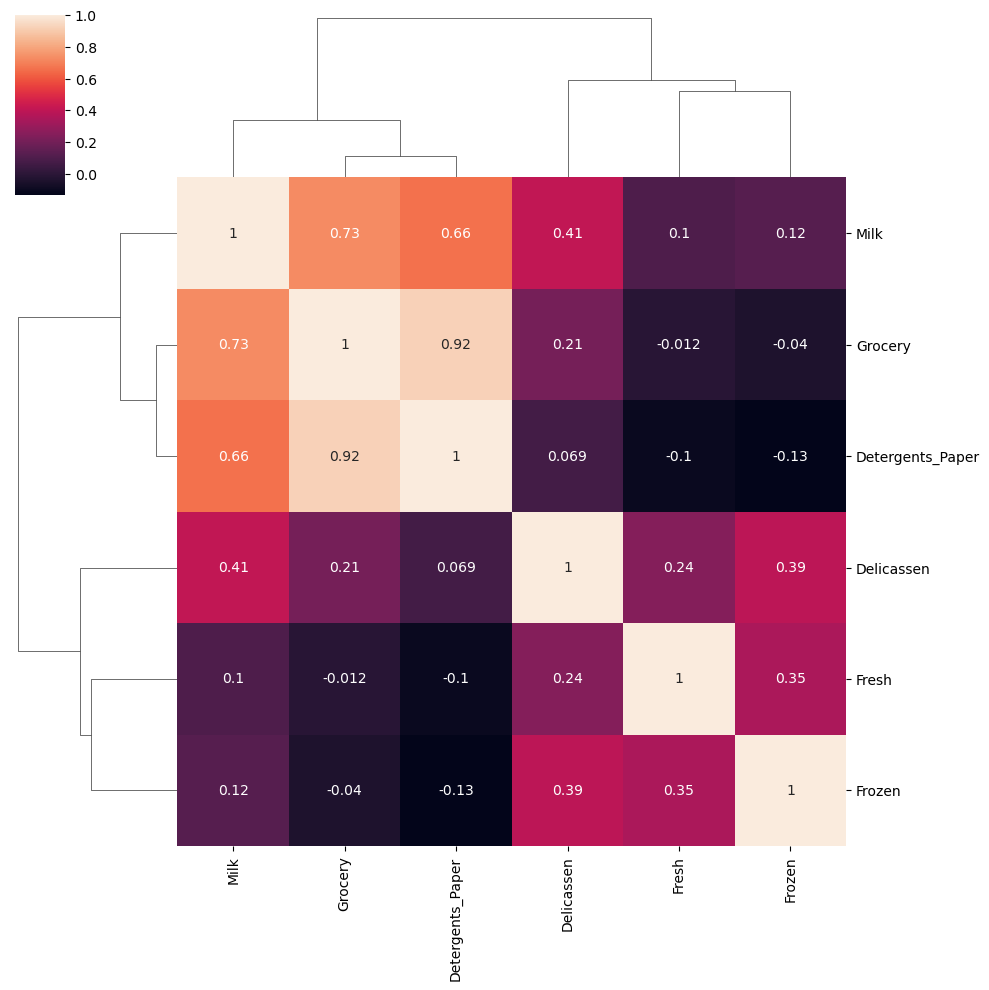

In [7]:
print('Correlation Between Spending Categories')
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True);

**PairPlot of the dataframe, colored by Region.**

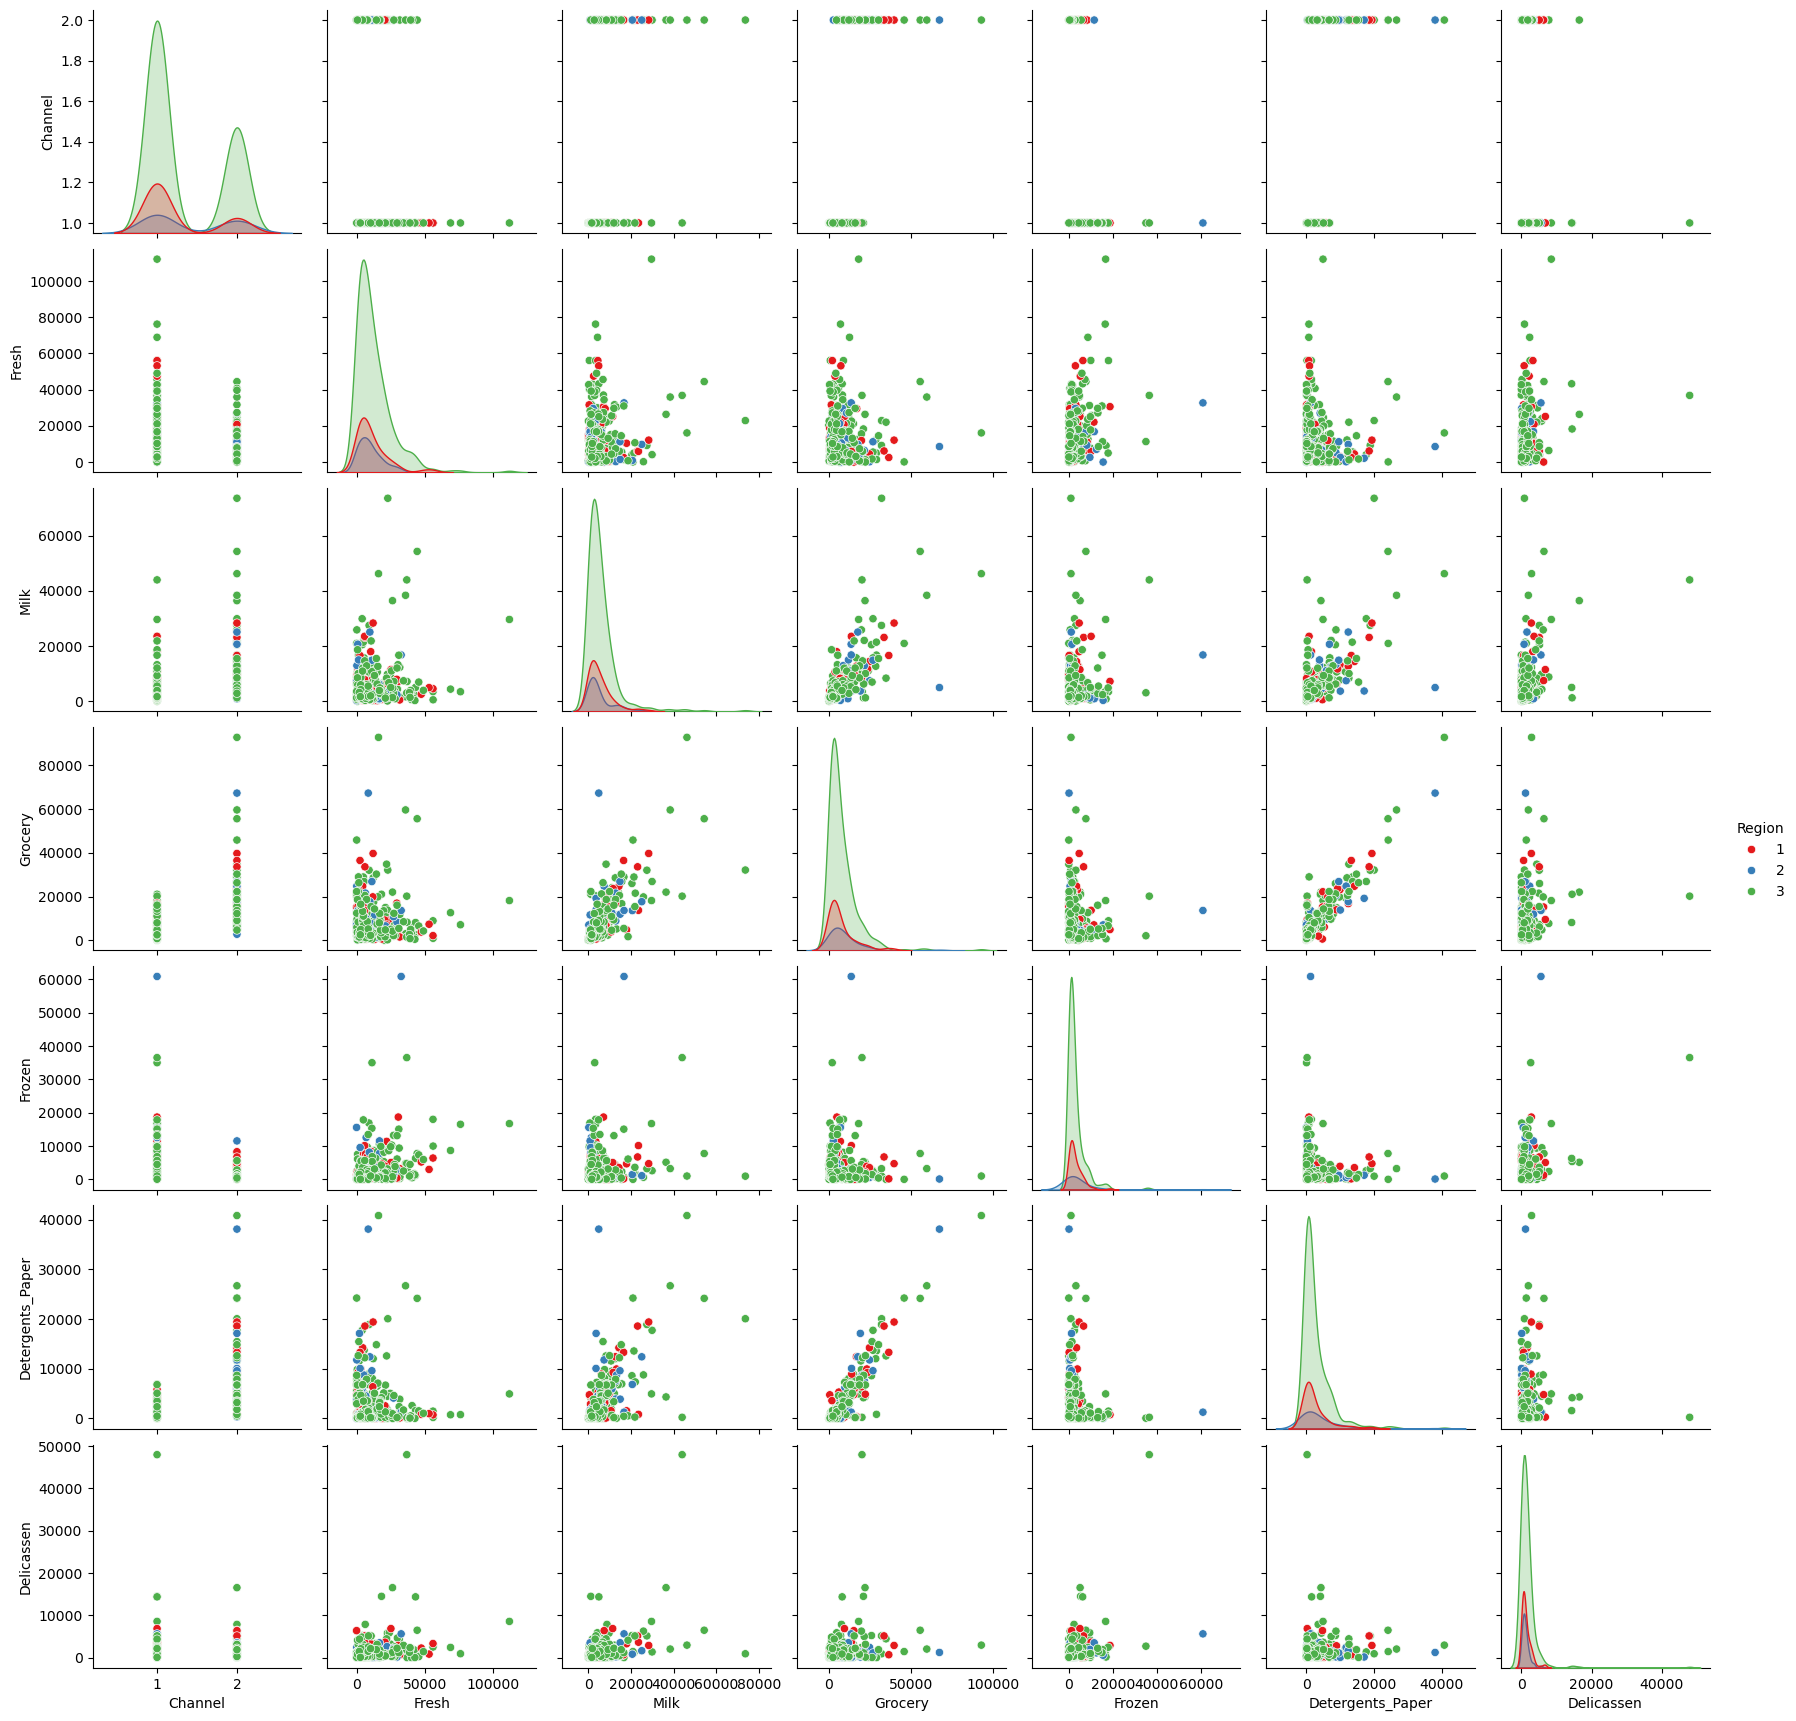

In [8]:
sns.pairplot(df,hue='Region',palette='Set1')

## DBSCAN

**Since the values of the features are in different orders of magnitude, I scaled the data.**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [10]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**Using DBSCAN and a for loop, I created a variety of models testing different epsilon values.**

**min_samples = 2 * the number of features.**

During the loop, I kept track of and log the percentage of points that are outliers. Also, I used the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [11]:
from sklearn.cluster import DBSCAN

In [15]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

**Line plot of the percentage of outlier points versus the epsilon value choice.**

Text(0.5, 0, 'Epsilon Value')

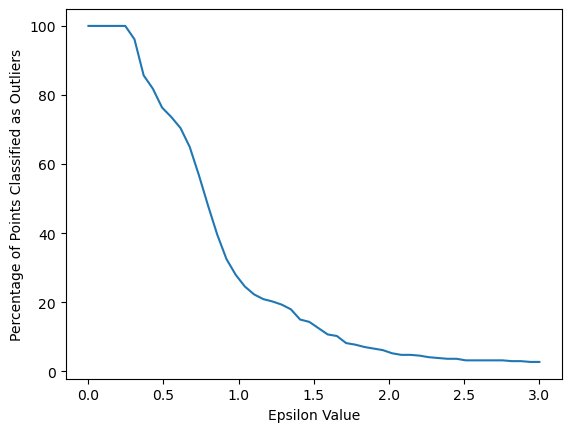

In [16]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

## DBSCAN with Chosen Epsilon

**Based on the plot created in the previous task, I retrained a DBSCAN model with a reasonable epsilon value, eps=2.**

In [17]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

**Scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

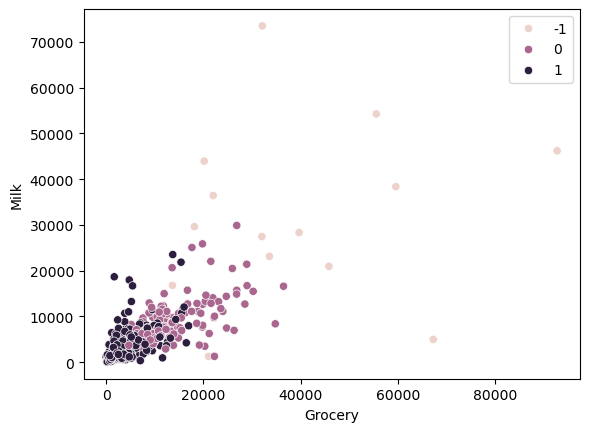

In [18]:
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_)

**Scatterplot of Milk vs. Detergents Paper colored by the labels.**

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

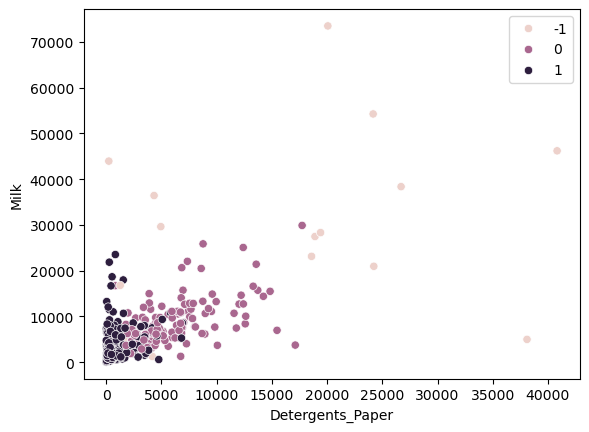

In [19]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)

**Created new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [20]:
df['Labels'] = dbscan.labels_

In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**Compared the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [22]:
cats = df.drop(['Channel','Region'],axis=1)
cat_means = cats.groupby('Labels').mean()

In [23]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


**Normalized the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and created a heatmap of the values.**

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)
scaled_means = pd.DataFrame(data,cat_means.index,cat_means.columns)

In [26]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<AxesSubplot:ylabel='Labels'>

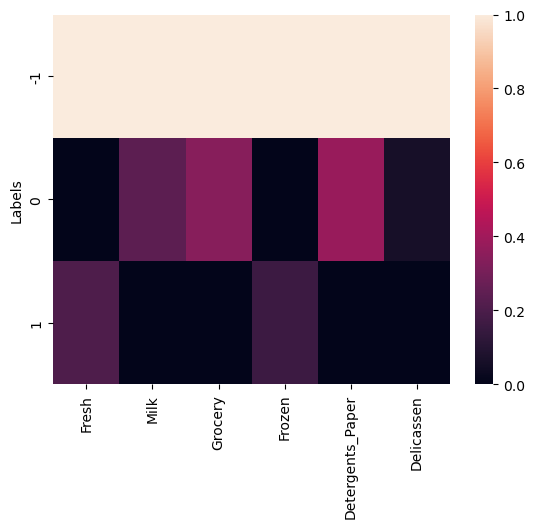

In [27]:
sns.heatmap(scaled_means)

**Another heatmap similar to the one above, but with the outliers removed**

<AxesSubplot:ylabel='Labels'>

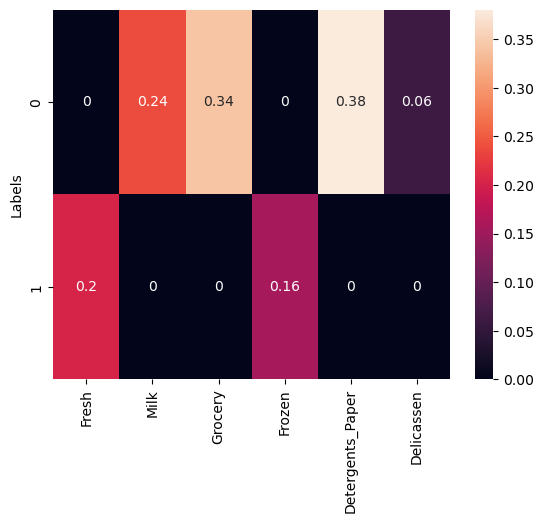

In [29]:
# -1 is outlier since it is way lighter in color, meaning too much spent money compared to other label groups
sns.heatmap(scaled_means.loc[[0,1]],annot=True)

**Q. What spending category were the two clusters most different in?**

We can see that Detergents Paper and Milk were the most significant difference.

# DBSCAN vs Clustering

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [33]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

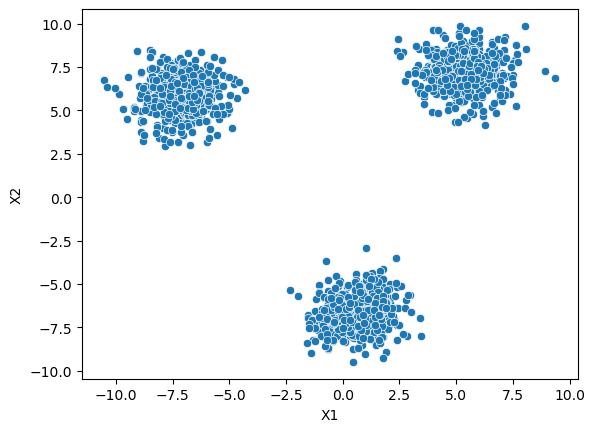

In [34]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [36]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

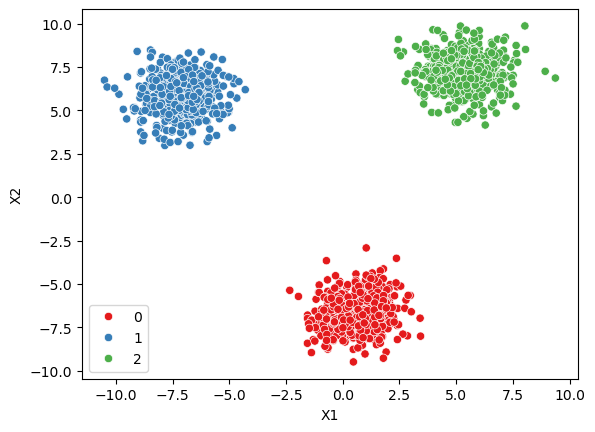

In [38]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)
display_categories(model,blobs)

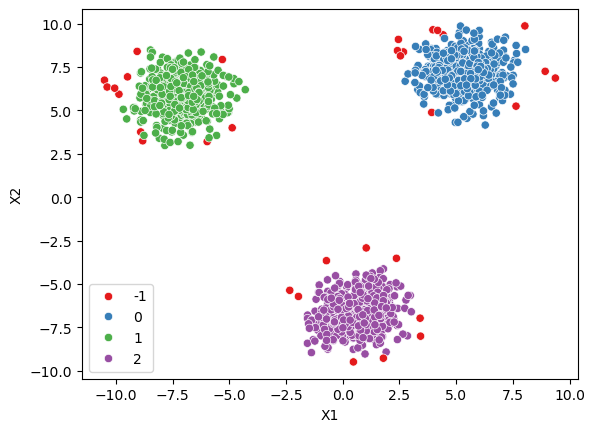

In [39]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.6)
display_categories(model,blobs)

In this case, both clustering and DBSCAN works (DBSCAN needs to be refined with different eps and minimum samples)
Yet, below cases does not work for clustering!

<AxesSubplot:xlabel='X1', ylabel='X2'>

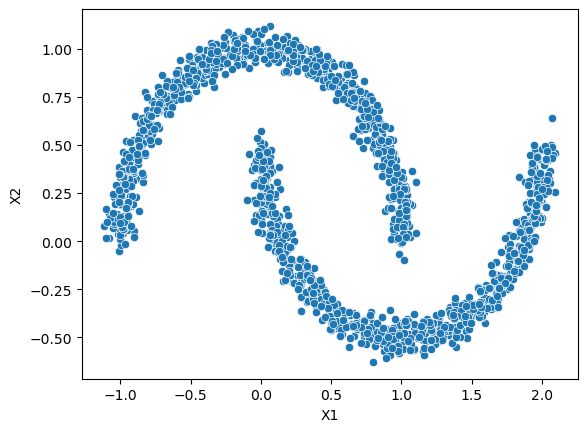

In [41]:
moons = pd.read_csv('../DATA/cluster_moons.csv')
sns.scatterplot(data=moons,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

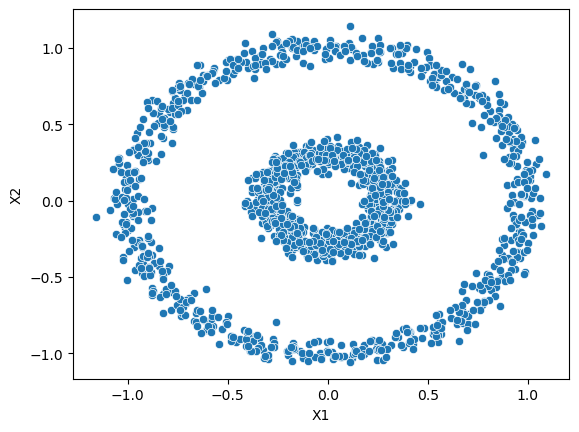

In [42]:
circles = pd.read_csv('../DATA/cluster_circles.csv')
sns.scatterplot(data=circles,x='X1',y='X2')

## Using KMeans

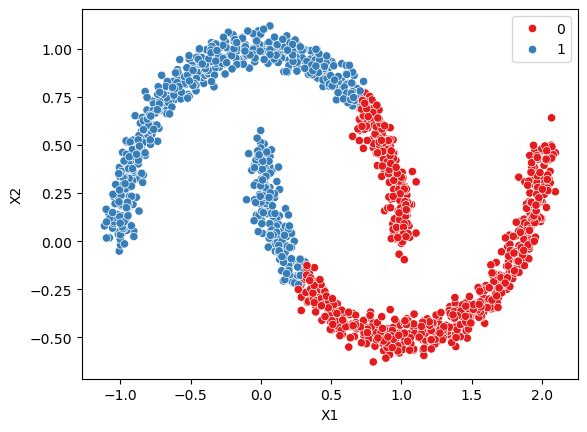

In [44]:
model = KMeans(n_clusters = 2)
display_categories(model,moons)

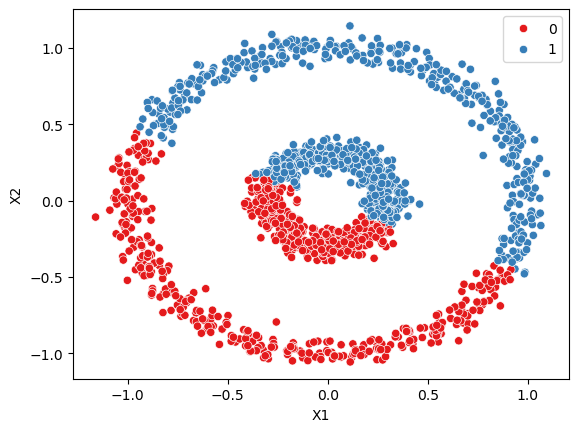

In [45]:
model = KMeans(n_clusters = 2)
display_categories(model,circles)

## Using DBSCAN

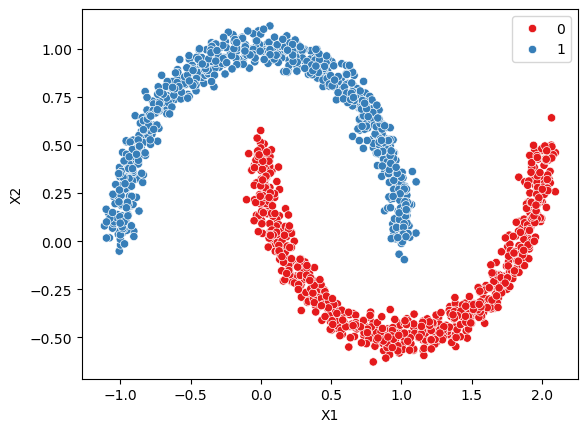

In [48]:
model = DBSCAN(eps=0.15)
display_categories(model,moons)

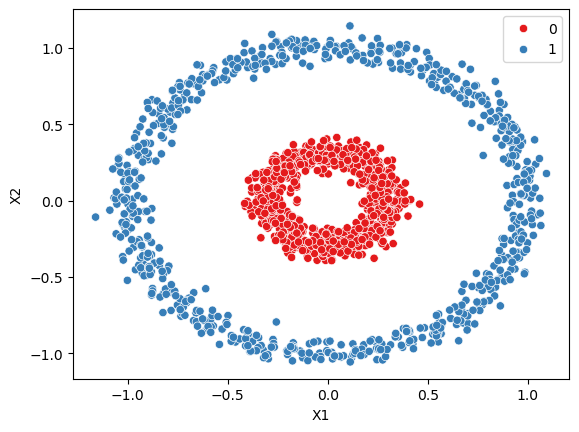

In [49]:
display_categories(model,circles)

For above two graphs, distance methods does not work but density method works. 

## DBSCAN Parameters

### Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

In [51]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

In [52]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)

# How to find a good epsilon?

outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

(0.0, 1.0)

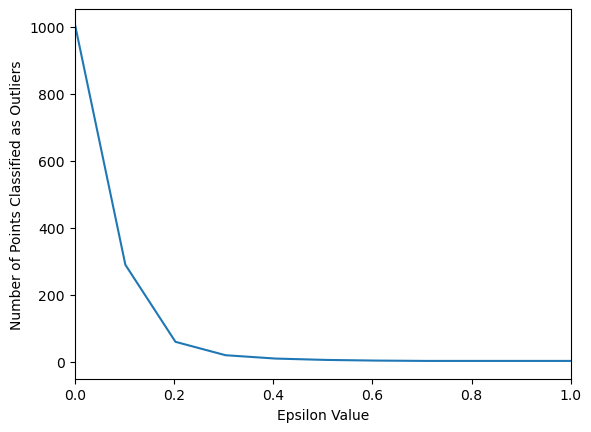

In [54]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

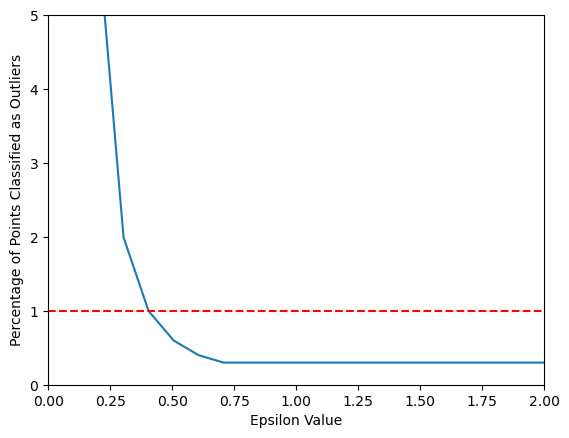

In [56]:
# If we think in terms of percentage targeting instead,
# we could "target" a percentage, like choose a range producing 1%-5% as outliers.

sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

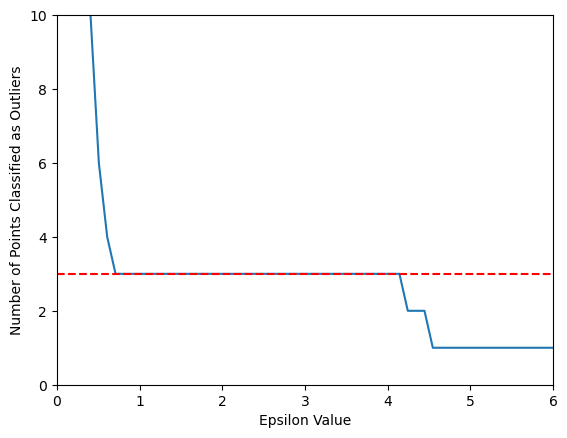

In [58]:
# If we want to think in terms of number of outliers targeting instead,
# we could "target" a number of outliers, such as 3 points as outliers.

sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

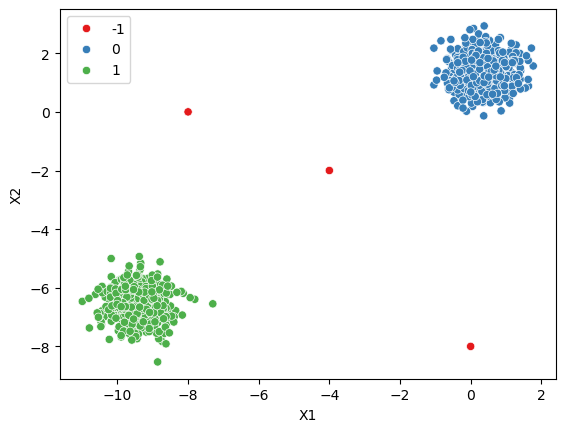

In [59]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

### Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

1. Sparse Data: might need larger min_samples value.
2. Dense Data: a smaller min_samples value may be appropriate.

A common starting point is to set min_samples equal to the dimensionality of your data. For example, if you are working with 2D data, you might start with min_samples=2.

Or

min_samples = 2 * the number of features

In [60]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Minimum Number of Samples')

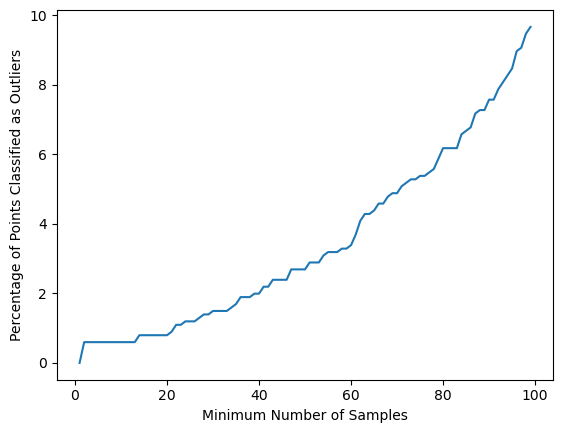

In [61]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")